In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
if not os.getcwd() == '/NN_project':
    os.chdir('..')

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import pandas as pd
from datetime import datetime

pd.set_option("display.max_columns", 101)

In [2]:
from src.data.VOC2012.data_preprocess import load_preprocess_save
from src.data.VOC2012.data import classes
#json_file = 'data/preprocessed/VOC2012/annotations.json'
pickle_file = 'data/preprocessed/VOC2012/preprocessed.pkl'
#df = load_preprocess_save(json_file, pickle_file)
df = pd.read_pickle(pickle_file)
df.head()

,folder,filename,object,width,height,depth,object_count,img_id,output,has_person,class,is_object,bb_coords,bb_sizes,bb_area,grid_box,bb_index,class_single,is_object_single,bb_coords_single,bb_sizes_single,weights,grid_0_0,grid_0_1,grid_0_2,grid_0_3,grid_1_0,grid_1_1,grid_1_2,grid_1_3,grid_2_0,grid_2_1,grid_2_2,grid_2_3,grid_3_0,grid_3_1,grid_3_2,grid_3_3,grid_output
0,VOC2012,2007_000027.jpg,"[{'grid_box': (2.0, 1.0), 'class': [14], 'is_o...",486,500,3,1,0,"[[0.53806585, 0.452, 0.3600823, 0.5, 1.0, 0.0,...",True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]",[0.1800411522633745],"[[(2.0, 1.0)]]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]","[[[1]], [[1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.16115703, 0.808, 0.3600823, 0.5, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
1,VOC2012,2007_000032.jpg,"[{'grid_box': (1.0, 1.0), 'class': [0], 'is_ob...",500,281,3,4,1,"[[0.408, 0.727758, 0.036, 0.17437722, 1.0, 0.0...",True,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1], [1]]","[[0.916, 0.8642857142857143], [0.32, 0.5071428...","[[0.542, 0.3736654804270463], [0.128, 0.124555...","[0.2025266903914591, 0.01594306049822064, 0.00...","[[(1.0, 1.0), (1.0, 1.0), (1.0, 2.0), (0.0, 3....",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.916, 0.8642857142857143]]","[[0.542, 0.3736654804270463]]","[[[1], [1], [1], [1]], [[1], [1], [1], [1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.28, 0.05, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.632, 0.92142856, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
2,VOC2012,2007_000033.jpg,"[{'grid_box': (2.0, 2.0), 'class': [0], 'is_ob...",500,366,3,3,2,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1]]","[[0.032, 0.03296703296703297], [0.612, 0.34065...","[[0.98, 0.4262295081967213], [0.122, 0.0710382...","[0.41770491803278686, 0.008666666666666666, 0....","[[(2.0, 2.0), (3.0, 2.0), (2.0, 2.0)]]",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.032, 0.03296703296703297]]","[[0.98, 0.4262295081967213]]","[[[1], [1], [1]], [[1], [1], [1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
3,VOC2012,2007_000039.jpg,"[{'grid_box': (2.0, 1.0), 'class': [19], 'is_o...",500,375,3,1,3,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.0, 0.978494623655914]]","[[0.376, 0.5066666666666667]]",[0.19050666666666669],"[[(2.0, 1.0)]]",0,"[

In [3]:
df['grid_output'][0]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.16115703, 0.808     , 0.3600823 , 0.5       , 1.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        ,

In [4]:
df = df[df['has_person']].reset_index()

In [5]:
df.head()

,index,folder,filename,object,width,height,depth,object_count,img_id,output,has_person,class,is_object,bb_coords,bb_sizes,bb_area,grid_box,bb_index,class_single,is_object_single,bb_coords_single,bb_sizes_single,weights,grid_0_0,grid_0_1,grid_0_2,grid_0_3,grid_1_0,grid_1_1,grid_1_2,grid_1_3,grid_2_0,grid_2_1,grid_2_2,grid_2_3,grid_3_0,grid_3_1,grid_3_2,grid_3_3,grid_output
0,0,VOC2012,2007_000027.jpg,"[{'grid_box': (2.0, 1.0), 'class': [14], 'is_o...",486,500,3,1,0,"[[0.53806585, 0.452, 0.3600823, 0.5, 1.0, 0.0,...",True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]",[0.1800411522633745],"[[(2.0, 1.0)]]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]","[[[1]], [[1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.16115703, 0.808, 0.3600823, 0.5, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
1,1,VOC2012,2007_000032.jpg,"[{'grid_box': (1.0, 1.0), 'class': [0], 'is_ob...",500,281,3,4,1,"[[0.408, 0.727758, 0.036, 0.17437722, 1.0, 0.0...",True,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1], [1]]","[[0.916, 0.8642857142857143], [0.32, 0.5071428...","[[0.542, 0.3736654804270463], [0.128, 0.124555...","[0.2025266903914591, 0.01594306049822064, 0.00...","[[(1.0, 1.0), (1.0, 1.0), (1.0, 2.0), (0.0, 3....",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.916, 0.8642857142857143]]","[[0.542, 0.3736654804270463]]","[[[1], [1], [1], [1]], [[1], [1], [1], [1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.28, 0.05, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.632, 0.92142856, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
2,10,VOC2012,2007_000129.jpg,"[{'grid_box': (1.0, 2.0), 'class': [1], 'is_ob...",334,500,3,6,10,"[[0.1002994, 0.364, 0.19461077, 0.724, 1.0, 0....",True,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1], [1], [1], [1]]","[[0.9578313253012049, 0.808], [0.5240963855421...","[[0.5538922155688623, 0.596], [0.2485029940119...","[0.3301197604790419, 0.12822754491017962, 0.11...","[[(1.0, 2.0), (3.0, 2.0), (0.0, 2.0), (0.0, 1....",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.08433734939759036, 0.852]]","[[0.592814371257485, 0.922]]","[[[1], [1], [1], [1], [1], [1]], [[1], [1], [1...","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.40361446, 0.456, 0.19461077, 0.724, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.084337346, 0.852, 0.5928144, 0.922, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.5301205, 0.024, 0.24550898, 0.936, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.40361446, 0.45..."
3,11,VOC2012,2007_000170.jpg,"[{'grid_box': (0.0, 1.0), 'class': [4], 'is_ob...",500,375,3,6,11,"[[0.046, 0.396, 0.08, 0.30666667, 1.0, 0.0, 0....",True,"[[0.0, 

In [42]:
from src.models.YOLOv3 import create_model
from src.models.DataGen import DataGenGrid
from src.models.losses import WholeOutputLoss
from src.models.metrics import Met
from src.models.metrics import test_met
from config import GRID_SIZE

datagen = DataGenGrid(batch_size=32, input_size=(256,256), validation_split=0)

K.clear_session()
model = create_model(len(classes))

log = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir=os.path.join("logs", log),
        histogram_freq=1,
        profile_batch=0)
]
print('Logs:', log)
losses = [WholeOutputLoss(grid_x=x, grid_y=y, grid_size=GRID_SIZE, negative_box_coef=0.5) for x in range(GRID_SIZE[0]) for y in range(GRID_SIZE[1])]
losses.append(None)
#metrics=[None]*16
#metrics.append(Met())
metrics=[]
#for i in range(0, 16):
#    metrics.append(test_met)
metrics.append(test_met)

#sgd= keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
#adam = keras.optimizers.Adam(clipvalue=0.5)
model.compile(loss=WholeOutputLoss(0,0), metrics=metrics, optimizer='adam')
# model.fit_generator(datagen.flow_train(df.head(5)), 
#                     epochs=10, 
#                    # validation_data=datagen.flow_val(df.head(1))
#                     callbacks=callbacks
#                    )
model.summary()

Logs: 2019_11_20_15_10_52
Tensor("metrics/test_met/truediv_2:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_5:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_8:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_11:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_14:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_17:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_20:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_23:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_26:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_29:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_32:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/truediv_35:0", shape=(None, None, 16), dtype=float32)
Tensor("metrics/test_met/true

In [45]:
history = model.fit_generator(datagen.flow_train(df.head().iloc[[1]]), 
                    epochs=10, 
                   # validation_data=datagen.flow_val(df.head(1))
                    verbose=1,
                    callbacks=callbacks
                   );

Found 1 validated image filenames.
Epoch 1/10
tf.Tensor(
[[[0.0584799  0.0530224  0.0759576  0.         0.06797941 0.06976069
   0.         0.05654275 0.06814349 0.05864866 0.0611866  0.04768766
   0.08242226 0.05997673 0.06677175 0.05764316]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.0584799  0.0530224  0.0759576  0.         0.06797941 0.06976069
   0.         0.05654275 0.06814349 0.05864866 0.0611866  0.04768766
   0.08242226 0.05997673 0.06677175 0.05764316]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.0584799  0.0530224  0.0759576  0.         0.06797941 0.06976069
   0.         0.05654275 0.06814349 0.05864866 0.0611866  0.04768766
   0.08242226 0.05997673 0.06677175 0.05764316]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.21764964 0.20130278 0.24166131 0.         0.23734008 0.24574427
   0.         0.21886836 0.23492475 0.21121435 0.23159191 0.19224128
   0.2476004  0.22681667 0.21228069 0.22124738]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.058479

1/1 [==============================] - 1s 928ms/step - loss: 0.4599 - test_met: 6.0000
Epoch 4/10
tf.Tensor(
[[[0.05863909 0.05148308 0.07879483 0.         0.06650713 0.06880001
   0.         0.05547786 0.06790767 0.05848004 0.06151667 0.04741374
   0.08131371 0.06112999 0.06670839 0.05791944]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.05863909 0.05148308 0.07879483 0.         0.06650713 0.06880001
   0.         0.05547786 0.06790767 0.05848004 0.06151667 0.04741374
   0.08131371 0.06112999 0.06670839 0.05791944]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.05863909 0.05148308 0.07879483 0.         0.06650713 0.06880001
   0.         0.05547786 0.06790767 0.05848004 0.06151667 0.04741374
   0.08131371 0.06112999 0.06670839 0.05791944]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.21887851 0.19887684 0.24581693 0.         0.23610815 0.245328
   0.         0.21768457 0.23453894 0.21116123 0.23161872 0.19066282
   0.24597088 0.2291627  0.20959727 0.22408184]]], shape

1/1 [==============================] - 1s 1s/step - loss: 0.4020 - test_met: 6.0000
Epoch 7/10
tf.Tensor(
[[[0.05790696 0.05067636 0.07985182 0.         0.06524028 0.0677229
   0.         0.05454051 0.06887274 0.05820617 0.06189277 0.04674757
   0.08133139 0.06164158 0.0673068  0.05800473]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.05790696 0.05067636 0.07985182 0.         0.06524028 0.0677229
   0.         0.05454051 0.06887274 0.05820617 0.06189277 0.04674757
   0.08133139 0.06164158 0.0673068  0.05800473]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.05790696 0.05067636 0.07985182 0.         0.06524028 0.0677229
   0.         0.05454051 0.06887274 0.05820617 0.06189277 0.04674757
   0.08133139 0.06164158 0.0673068  0.05800473]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.21904282 0.19785798 0.2472574  0.         0.23474322 0.24433689
   0.         0.21653427 0.23518345 0.21112347 0.23237018 0.1890477
   0.24536377 0.2304398  0.20941156 0.22524157]]], shape=(1, 

1/1 [==============================] - 1s 1s/step - loss: 0.1991 - test_met: 3.0000
Epoch 10/10
tf.Tensor(
[[[0.05682852 0.05052529 0.08012675 0.         0.06430323 0.06640686
   0.         0.05409767 0.07017846 0.05805685 0.06212349 0.04636959
   0.08147555 0.06196968 0.06812119 0.05836861]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.05682852 0.05052529 0.08012675 0.         0.06430323 0.06640686
   0.         0.05409767 0.07017846 0.05805685 0.06212349 0.04636959
   0.08147555 0.06196968 0.06812119 0.05836861]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.05682852 0.05052529 0.08012675 0.         0.06430323 0.06640686
   0.         0.05409767 0.07017846 0.05805685 0.06212349 0.04636959
   0.08147555 0.06196968 0.06812119 0.05836861]]], shape=(1, 1, 16), dtype=float32)
tf.Tensor(
[[[0.2185518  0.19786316 0.24751379 0.37550306 0.2334663  0.24258648
   0.         0.21599914 0.23615554 0.21144892 0.23272231 0.18839481
   0.24472539 0.23119844 0.21044973 0.22596633]]], shape

Found 5 validated image filenames.
2 1 [0.5130881  0.47078633] [0.4530418  0.60098845] 0.002200488 1.0


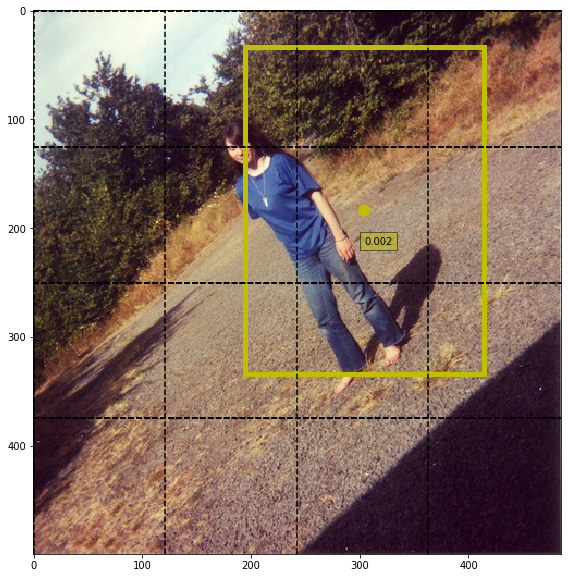

0 3 [0.09208229 0.00025544] [0.00027817 0.03883013] 0.017061686 1.0
1 2 [0.8370562 0.999751 ] [0.00023735 0.03736755] 0.07257021 1.0


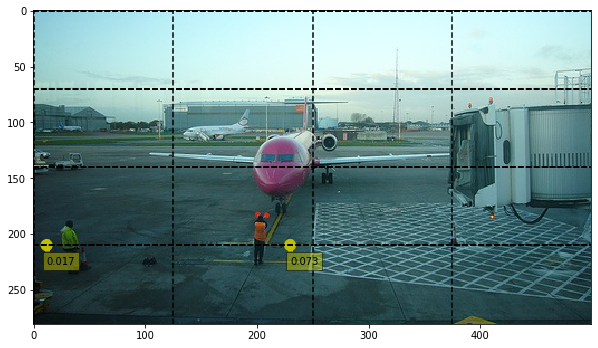

0 1 [0.6601515  0.51192814] [0.6253187  0.44157222] 0.003214175 1.0
2 1 [0.51430535 0.45086634] [0.46390232 0.61217004] 0.0016062473 1.0
3 2 [0.5951657 0.6205043] [0.48916504 0.6386961 ] 0.00264871 1.0


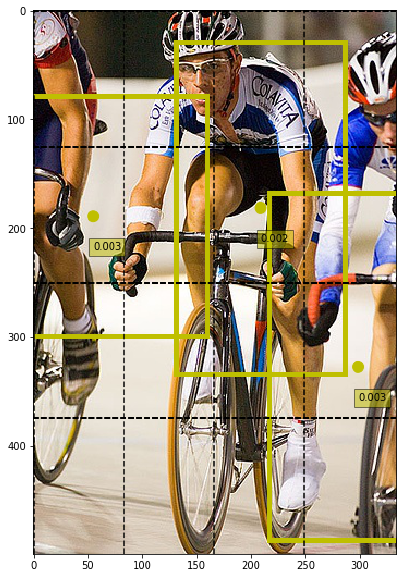

0 1 [0.65226376 0.50333977] [0.6238561  0.45173314] 0.0029306905 1.0
1 2 [0.8479966 0.9997965] [0.00019699 0.0342389 ] 0.0687649 1.0


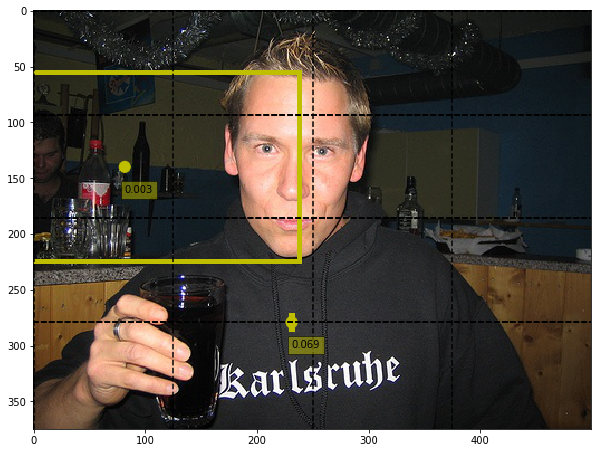

1 2 [0.8416274 0.9997906] [0.000197   0.03554335] 0.06895237 1.0


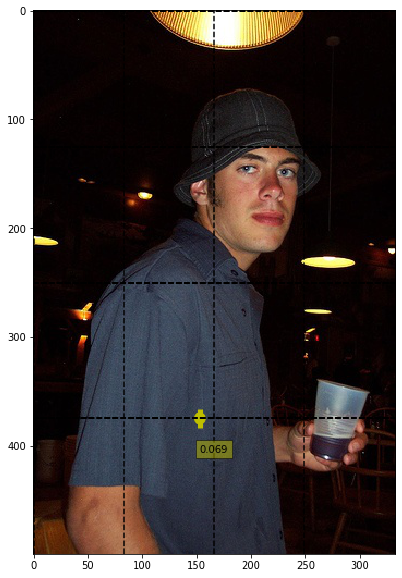

In [46]:
from src.data.VOC2012.plot import plot_grid
num_predictions = 5
pred = model.predict_generator(datagen.flow_train(df.head(num_predictions)))
for i in range(num_predictions):
    plot_grid(df, i, np.array(pred[i][0]), plot_ground_truth=False)

In [90]:
pred[0][0][0]

array([0.5078126 , 0.5303503 , 0.5297393 , 0.48233554, 0.35764232],
      dtype=float32)

In [86]:
pred[0]

array([[[0.5059632 , 0.53553087, 0.5284923 , 0.48383707, 0.35758469],
        [0.5164336 , 0.53907704, 0.5816655 , 0.532524  , 0.37472382],
        [0.4182749 , 0.46908224, 0.45884585, 0.54928166, 0.39312497],
        [0.48360792, 0.5512287 , 0.5209126 , 0.52135485, 0.42469203],
        [0.50424194, 0.51853096, 0.53497726, 0.4444174 , 0.42064163],
        [0.47094566, 0.46585226, 0.5267957 , 0.5168556 , 0.3720748 ],
        [0.48405442, 0.5294593 , 0.5409071 , 0.52254546, 0.34478155],
        [0.49500084, 0.56169903, 0.46012735, 0.4406833 , 0.40107173],
        [0.49937543, 0.47673818, 0.5664431 , 0.47407955, 0.43024608],
        [0.21639702, 0.761553  , 0.37021655, 0.50556093, 0.5697104 ],
        [0.47863102, 0.48109508, 0.48669013, 0.4830726 , 0.3639734 ],
        [0.5033041 , 0.5647986 , 0.54176533, 0.535911  , 0.45747417],
        [0.46673387, 0.52635723, 0.5540454 , 0.5137515 , 0.3696147 ],
        [0.48372614, 0.47703862, 0.5657282 , 0.5569415 , 0.40457794],
        [0.5667548 ,